![Deep Learning for Scientists in a hurry](./fig/Title.png)

In [1]:
%load_ext watermark

In [2]:
%watermark

Last updated: 2022-09-01T12:55:46.647674-04:00

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.2.0

Compiler    : Clang 13.0.0 (clang-1300.0.29.30)
OS          : Darwin
Release     : 21.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [3]:
import time
start = time.time()
chapter_number = 2
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import torch

In [5]:
%watermark -iv

numpy     : 1.23.1
torch     : 1.12.0
matplotlib: 3.5.2



# PyTorch Tensors

We learn that Python offers a few [Sequence Types](https://docs.python.org/3/library/stdtypes.html#typesseq). 
There are three basic sequence types: lists, tuples, and range objects.
Python itself is not a particularly fast programming language and using those sequence types does not help when dealing with large amounts of numbers as we will typically find on Deep Learning applications.

The reason why we can still consider Python an excellent language for Scientific Computing is that we can avoid using list and tuples and delegate the hard work of numerical manipulations to specialized libraries such as NumPy.

We learn in Python Programming that we can create lists and tuples as follows:

In [6]:
a_list = [1,2,3,4]
b_tupl = (7,8,9)

Lists are mutable, ie you can add or remove elements while a tuple is unmutable, you can only add elements by creating a new tuple. 

In [7]:
a_list.append(5)
a_list

[1, 2, 3, 4, 5]

We also learn from our lesson on NumPy that this library offers a convenient object called, `ndarray` that can store multidimensional arrays. We can for example use the list and tuple above to create NumPy arrays from them:

In [8]:
a_np = np.array(a_list)
a_np

array([1, 2, 3, 4, 5])

In [9]:
b_np = np.array(b_tupl)
b_np

array([7, 8, 9])

Python lists and tuples are collections of Python objects that are allocated individually in memory. There is no promise of contiguity and as an object, they use more memory than the simple storage of their value.

NumPy arrays on the other hand are views over (typically) contiguous portions of memory and they contained unboxed C numeric types instead of Python objects.

NumPy arrays seem like the ideal objects in Python for Deep Learning, except for being limited to allocate the arrays in CPU RAM.

One of the reasons for the success of Deep Learning is the availability of powerful accelerators such Graphic Processing Units (GPUs). A GPU has its RAM and can only process data that is allocated there. We need an object that is capable of working with Arrays stored in CPU RAM as well as GPU RAM. The solution in PyTorch is to create its data type called **PyTorch tensors**.

In this notebook, we will learn what we need to know for working with **PyTorch Tensors** but first let's check if we are working on a machine where a GPU is present and available for working with PyTorch. We will concentrate our discussion on NVIDIA GPUs the most common accelerators which are widely supported by PyTorch.

## Checking the presence of a CUDA device

There are several ways to check if a GPU is present in the machine and CUDA capable. For NVIDIA GPUs we can execute the command `nvidia-smi` from a terminal. Inside a jupyter notebook, we can achieve the same by prefixing commands with an exclamation mark (`!`)

In [10]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


One option from inside PyTorch is wiht the command `torch.cuda.is_available()`.
This is a small recipe for identifying if we can work with the GPU on PyTorch.

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


## Creation

There are several tensor constructors. Similar to those in Numpy.

In [12]:
a = torch.ones(3)
a

tensor([1., 1., 1.])

In [13]:
x = torch.zeros(4,4)
x

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

There is a constructor for uninitialized variables:

In [14]:
y = torch.empty(5,5)
y

tensor([[ 0.0000e+00, -1.5846e+29, -3.5394e-12,  2.5250e-29,  1.8028e+28],
        [ 4.6114e+24,  4.7851e+22,  3.1096e-18,  2.7254e+20,  9.3168e-39],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])

The values contain the remanents of the data in the locations of memory where the object is created.

A Tensor with random values in its entries:

In [15]:
x = torch.rand(3,3)
x

tensor([[0.0076, 0.3449, 0.2861],
        [0.3971, 0.6360, 0.3176],
        [0.2730, 0.9297, 0.8267]])

In [16]:
x = torch.randint(0,9,(3,3))
x

tensor([[5, 7, 4],
        [1, 0, 3],
        [1, 5, 1]])

Similar to Numpy, new tensor can be created from lists and lists of lists:

In [17]:
x = torch.tensor([3.14, 1.67])
x

tensor([3.1400, 1.6700])

Consider for example having a tensor for storing the X and Y coordinates of a triangle.

In [18]:
points = torch.tensor([-1.0, -1.0, 0.0, 1.0, 1.0, -1.0])
points

tensor([-1., -1.,  0.,  1.,  1., -1.])

The position of the first point would be:

In [19]:
float(points[0]), float(points[1])

(-1.0, -1.0)

A unidimensional array works but it will not be ideal. In this case, a 2-D array is a better solution.

In [20]:
points = torch.tensor([[-1.0, -1.0], [0.0, 1.0], [1.0, -1.0]])
points

tensor([[-1., -1.],
        [ 0.,  1.],
        [ 1., -1.]])

PyTorch tensors have a `shape` the number of values on each dimension. In mathematical terminology is the *order of a tensor*.

In [21]:
points.shape

torch.Size([3, 2])

Another element that shares familiarity with NumPy is the `dtype`. Consider for example this array of integers where we are explicitly saying that we will use 8 bits per value.

In [22]:
x=torch.tensor(range(16), dtype=torch.int8).reshape(4,4)
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]], dtype=torch.int8)

New arrays can be created with the same dtype from another tensor. Examples:

In [23]:
x.new_empty((2,2))

tensor([[5, 0],
        [0, 0]], dtype=torch.int8)

In [24]:
x.new_full((2,2),2.3)

tensor([[2, 2],
        [2, 2]], dtype=torch.int8)

In [25]:
x.new_ones((2,2))

tensor([[1, 1],
        [1, 1]], dtype=torch.int8)

In [26]:
x.new_zeros((2,2))

tensor([[0, 0],
        [0, 0]], dtype=torch.int8)

In [27]:
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]], dtype=torch.int8)

The Tensor dtype is very similar to the NumPy dtype. Here is the list

| Name | Description |
|:--|:--:|
|`torch.float32` or `torch.float` | Single precision floating point number |
|`torch.float64` or `torch.double` | Double precision floating point number |
|`torch.float16` or `torch.half` | Half precision floating point number |
|`torch.int8`  | 8-bit integer with signed |
|`torch.uint8`  | 8-bit integer unsigned |
|`torch.int16`  | 16-bit integer with sign |
|`torch.int32`  | 32-bit integer with sign |
|`torch.int64`  | 64-bit integer with sign |
|`torch.bool`  | Boolean |

The default type for tensors is `torch.float`

We can find the type with the `dtype` property

In [28]:
x.dtype

torch.int8

There are two ways of creating copies of a tensor with a declared dtype.

In [29]:
xd = x.double()
xd

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]], dtype=torch.float64)

In [30]:
x.to(torch.float16)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]], dtype=torch.float16)

In [31]:
x.to(dtype=torch.half)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]], dtype=torch.float16)

## The Tensor Storage

Values of tensors are allocated in contiguous chunks in memory and they are managed by `torch.Storage` instances.

Multiple tensors can index the same storage in different ways. That offers a powerful tool to manipulate multidimensional arrays without the overhead of having to copy the data to a different location each time we change the way or portion of data that we want to access. For example:

In [32]:
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]], dtype=torch.int8)

In [33]:
id(x)

4576652848

In [34]:
x.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
[torch.storage._TypedStorage(dtype=torch.int8, device=cpu) of size 16]

## In place operations

We can change values of a tensor explicitly element by element or we can use functions that will operate over an entire tensor. Operations that act over the tensor instead of creating a new one have the underscore suffix (`_`).
Examples:

In [35]:
x = torch.rand(3,4)
x

tensor([[0.4768, 0.4613, 0.7798, 0.4502],
        [0.3329, 0.6372, 0.4861, 0.8882],
        [0.2301, 0.9201, 0.0680, 0.4982]])

In [36]:
x.zero_()
x

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [37]:
x.fill_(3.14)
x

tensor([[3.1400, 3.1400, 3.1400, 3.1400],
        [3.1400, 3.1400, 3.1400, 3.1400],
        [3.1400, 3.1400, 3.1400, 3.1400]])

## Anatomy of a tensor (Size, Offset and Stride)

Consider this tensor:

In [38]:
x = torch.arange(11,17,1)
x

tensor([11, 12, 13, 14, 15, 16])

In [39]:
x = x.reshape(3,2)
x

tensor([[11, 12],
        [13, 14],
        [15, 16]])

Lets see the storage for it:

In [40]:
x.storage()

 11
 12
 13
 14
 15
 16
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 6]

And the python location in memory

In [41]:
id(x)

4576808288

There are 3 elements that determine how elements from x will be returned from the two indexes used for this 2-D tensor. They are the `shape`, `stride` and `offset`.

In [42]:
x.shape

torch.Size([3, 2])

In [43]:
x.stride()

(2, 1)

In [44]:
x.storage_offset()

0

<img src="./fig/Tensor_Shape_Stride.png" width=400 height=60  >

In [45]:
x2 = x.transpose(0,1)
x2

tensor([[11, 13, 15],
        [12, 14, 16]])

An let's see how it looks like:

In [46]:
x2.storage()

 11
 12
 13
 14
 15
 16
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 6]

In [47]:
x2.shape

torch.Size([2, 3])

In [48]:
x2.stride()

(1, 2)

<img src="./fig/Tensor_Shape_Stride_Trans.png" width=400 height=60  >

Now consider another example with a view:

In [49]:
a = torch.arange(11,20).reshape(3,3)
a

tensor([[11, 12, 13],
        [14, 15, 16],
        [17, 18, 19]])

In [50]:
b = a[::2]
b

tensor([[11, 12, 13],
        [17, 18, 19]])

In [51]:
b.storage()

 11
 12
 13
 14
 15
 16
 17
 18
 19
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 9]

In [52]:
b.shape

torch.Size([2, 3])

In [53]:
b.stride()

(6, 1)

Now consider this other example:

In [54]:
c = a[1:,1:]
c

tensor([[15, 16],
        [18, 19]])

In [55]:
c.storage()

 11
 12
 13
 14
 15
 16
 17
 18
 19
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 9]

In [56]:
c.shape

torch.Size([2, 2])

In [57]:
c.stride()

(3, 1)

## Contigous tensors

Some operations with PyTorch tensors only operate with contiguous tensors. We can ask for the contiguity using the method `is_contiguous`. Tensors can become contiguous with the method `.contiguous()`. The method preserves the content but will change the storage and stride, it is a copy.

In [58]:
a.is_contiguous()

True

In [59]:
b.is_contiguous()

False

In [60]:
c.is_contiguous()

False

In [61]:
d=c.contiguous()
d

tensor([[15, 16],
        [18, 19]])

In [62]:
d.storage()

 15
 16
 18
 19
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 4]

In [63]:
d.stride()

(2, 1)

In [64]:
d.shape

torch.Size([2, 2])

## Operations

Consider these tensors with random entries from 0 to 1

In [65]:
x=torch.rand((2,3))
print(x)
y=torch.rand((2,3))
print(y)

tensor([[0.3372, 0.4874, 0.1386],
        [0.3513, 0.3229, 0.0637]])
tensor([[0.9704, 0.6633, 0.6434],
        [0.1298, 0.4312, 0.6329]])


There are several ways to do element-wise operations such as the sum. Using the overloaded operator:

In [66]:
x+y

tensor([[1.3076, 1.1507, 0.7820],
        [0.4811, 0.7541, 0.6966]])

Or the class method

In [67]:
torch.add(x,y)

tensor([[1.3076, 1.1507, 0.7820],
        [0.4811, 0.7541, 0.6966]])

In [68]:
z=torch.empty((2,3))
torch.add(x,y, out=z)
z

tensor([[1.3076, 1.1507, 0.7820],
        [0.4811, 0.7541, 0.6966]])

Or the instance method:

In [69]:
y.add(x)

tensor([[1.3076, 1.1507, 0.7820],
        [0.4811, 0.7541, 0.6966]])

The instance method also includes an *in-place* version:

In [70]:
y.add_(x)
y

tensor([[1.3076, 1.1507, 0.7820],
        [0.4811, 0.7541, 0.6966]])

## Data extraction into Python numbers and lists

In [71]:
x = torch.arange(11,19).reshape(2,4)
x

tensor([[11, 12, 13, 14],
        [15, 16, 17, 18]])

In [72]:
y=x[1,2]
y

tensor(17)

In [73]:
y.item()

17

In [74]:
x.tolist()

[[11, 12, 13, 14], [15, 16, 17, 18]]

## Torch Tensors {to, from} Numpy Arrays 

In [75]:
x=torch.tensor(range(36)).reshape(6,6)
x

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35]])

In [76]:
y=x.numpy()
y

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

The Torch Tensor and NumPy array will share their underlying memory locations (if the Torch Tensor is on CPU), and changing one will change the other.

In [77]:
x[0,0]=999
y

array([[999,   1,   2,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23],
       [ 24,  25,  26,  27,  28,  29],
       [ 30,  31,  32,  33,  34,  35]])

Conversion from Numpy to Torch preserving memory addressing is also possible


In [78]:
xn=np.random.rand(3,3)
xn

array([[0.96188153, 0.56784203, 0.25352348],
       [0.10043693, 0.7271248 , 0.91652376],
       [0.98135794, 0.12622719, 0.32199153]])

In [79]:
xt=torch.from_numpy(xn)
xt

tensor([[0.9619, 0.5678, 0.2535],
        [0.1004, 0.7271, 0.9165],
        [0.9814, 0.1262, 0.3220]], dtype=torch.float64)

In [80]:
xt[0,0]=100
xn

array([[100.        ,   0.56784203,   0.25352348],
       [  0.10043693,   0.7271248 ,   0.91652376],
       [  0.98135794,   0.12622719,   0.32199153]])

## Moving tensors to the GPU

As we mention before, one of the biggest motivations for creating a new data type instead of using NumPy is the need for storing arrays on accelerators such as NVIDIA GPUs.

Every PyTorch tensor can be transferred to one of the GPUs to perform fast computations there.

Operations on the GPU will be executed using GPU-specific operations.

The operations in this section only work if this notebook is running on a machine with GPU access.
To preserve the executability of this notebook we are adding a conditional in case this notebook is running on a machine without one.

In [81]:
if torch.cuda.is_available():
    x_gpu = torch.tensor([3.14, 1.67], device = 'cuda')

In [82]:
x = torch.arange(10)

if torch.cuda.is_available():
    x_gpu = x.to(device='cuda:0')

Data can be moved from the CPU to the GPU and back

In [83]:
x = torch.arange(10)

if torch.cuda.is_available():
    x_gpu = x.cuda()
    x_cpu = x_gpu.cpu()

## Serializing tensors

There are several ways of storing tensors. Storing large amounts of numerical data in text format is a bad idea.

Here we will explore two alternatives to export tensors efficiently.

### Dedicated serialization

In [84]:
x = torch.arange(10)
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [85]:
torch.save(x,'./output/torch_x.t')

In [86]:
x2 = torch.load('./output/torch_x.t')
x2

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### HDF5

In [87]:
import os
import h5py

In [88]:
if os.path.exists('./output/torch_x.h5'):
    os.remove('./output/torch_x.h5')

Writing to a HDF5 file:

In [89]:
wf = h5py.File('./output/torch_x.h5', 'w')

In [90]:
dset = wf.create_dataset('my_tensor', data=x.numpy())

In [91]:
wf.close()

Reading from a HDF5 file:

In [92]:
f = h5py.File('./output/torch_x.h5', 'r')

In [93]:
dset = f['my_tensor']

In [94]:
dset[:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
x = torch.from_numpy(dset[:])
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Autograd: Automatic gradient evaluation

This is a more advance topic that is very particular for PyTorch for the purpose of be use for Neural Networks.

In [96]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [97]:
y = x + 3.14
print(y)

tensor([[4.1400, 4.1400, 4.1400],
        [4.1400, 4.1400, 4.1400],
        [4.1400, 4.1400, 4.1400]], grad_fn=<AddBackward0>)


In [98]:
y.grad_fn

In [99]:
z = y**2 * y * 3
out = z.mean()

print(z, out)

tensor([[212.8739, 212.8739, 212.8739],
        [212.8739, 212.8739, 212.8739],
        [212.8739, 212.8739, 212.8739]], grad_fn=<MulBackward0>) tensor(212.8739, grad_fn=<MeanBackward0>)


The property of being tracked for gradient computation can be enable after the object is created

In [100]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


## Gradients

In [101]:
out.backward()

In [102]:
x.grad

tensor([[17.1396, 17.1396, 17.1396],
        [17.1396, 17.1396, 17.1396],
        [17.1396, 17.1396, 17.1396]])

# Exercises

   1. Create a tensor with the first 10 odd numbers. Use for example lists comprehension or a `torch.arange` or even `numpy.arange`.
   
      a. Predict the shape, the offset, stride. Test your ideas by inspecting the actual values from them.
      
      b. Can you transpose this tensor? Can you find a way of doing it?
      
      c. Change the shape to get the tensor with 2 rows.
      
      d. Create another view where you remove the zero. Check that your new tensor now has 9 elements.
      
      e. For the tensor in (d) reshape it to a 3x3 tensor.
      
   2. Consider the tensor
   
      `x = torch.arange(27).reshape(3,3,3)`
      
      a. What is the view that will return `tensor([ 4, 13, 22])`
      
      b. Create a view that return the 8 corners of the tensor
         The 8 corners are `[[[0, 2], [6, 8]], [[18, 20], [24, 26]]]`
         
      c. Create the tensor `x[1:,2:,-1]`. Predict and then check the size. offset and stride.
      
   3. Import the module `math` from the standard library.
   
      a. Try to apply for example `math.exp()` to the whole tensor.
      
      b. Can you find the function on pytorch library?
      
      c. Apply the function using the pytorch function.
      
   4. Check if you can use a GPU.
   
      a. Move the tensor x to the GPU
      
      b. Execute the operation on the GPU
      
      c. Return the resulting tensor to the CPU.
      
   5. Remember the sofmax function:
   
   $$\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} \ \ \ \ \text{ for } i = 1, \dotsc , K \text{ and } \mathbf z=(z_1,\dotsc,z_K) \in\mathbb{R}^K.$$

      a. Create a 1-D random tensor with 100 elements
      
      b. Compute the softmax of the random tensor. Search for the methods that allow you to perform the task without using loops.
      
      c. Take the first element of the tensor and change it for a large value such as $999$ and the last element for a negative value such as $-999$.
      
      d. Compute again the softmax
      
      e. Create a slice with the fist and last value of the softmax result
      

---

# References

There are many books about Deep Learning and many more on Machine Learning. 
This list is by no means an exhaustive list of books. I am listing the books from which I took inspiration. Also, I am listing materials where I found better ways to present topics. Often I am amazed by how people can create approachable materials for seemingly dry subjects.

The order of the books goes from divulgation and practical to the more rigorous and mathematical. Slides, blogs, and videos are those I have found over the internet or suggested by others.

### Selection of Books on Deep Learning

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Kelleher" 
       src="./fig/books/Deep Learning - Kelleher.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning<br>
      John D. Kelleher<br>
      2019<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Deep Learning - Charniak" 
       src="./fig/books/Introduction to Deep Learning - Charniak.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Deep Learning<br>
      Eugene Charniak<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Deep Learning - Skansi" 
       src="./fig/books/Introduction to Deep Learning - Skansi.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Deep Learning<br>
      Sandro Skansi<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with PyTorch - Subramanian" 
       src="./fig/books/Deep Learning with PyTorch - Subramanian.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with PyTorch<br>
      Vishnu Subramanian<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with PyTorch - Stevens" 
       src="./fig/books/Deep Learning with PyTorch - Stevens.png" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with PyTorch<br>
      Eli Stevens, Luca Artiga and Thomas Viehmann<br>
      2020<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with Python - Chollet" 
       src="./fig/books/Deep Learning with Python - Chollet.jpg" 
       height="100" width="100" />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with Python (Second Edition)<br>
      François Chollet<br>
      2021<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Patterson" 
       src="./fig/books/Deep Learning - Patterson.jpeg"
       height="100" width="100" />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning, a practitioner's approach<br>
      Josh Patterson and Adam Gibson<br>
      2017<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Goodfellow" 
       src="./fig/books/Deep Learning - Goodfellow.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning<br>
      Ian Goodfelow, Yoshua Bengio, and Aaron Courville<br>
      2016<br>
  </div>
</div>

### Interactive Books

  * [Dive into Deep Learning](https://d2l.ai/index.html)<br>
    Interactive deep learning book with code, math, and discussions<br> 
    Implemented with PyTorch, NumPy/MXNet, and TensorFlow<br>
    Adopted at 300 universities from 55 countries


### Slides

  * John Urbanic's ["Deep Learning in one Afternoon"](https://www.psc.edu/wp-content/uploads/2022/04/Deep-Learning.pdf)<br>
An excellent fast, condensed introduction to Deep Learning.<br>
John is a Parallel Computing Scientist at Pittsburgh Supercomputing Center

  * [Christopher Olah's Blog](http://colah.github.io) is very good. For example about [Back Propagation](http://colah.github.io/posts/2015-08-Backprop)

  * Adam W. Harley on his CMU page offers [An Interactive Node-Link Visualization of Convolutional Neural Networks](https://www.cs.cmu.edu/~aharley/vis/)



### Jupyter Notebooks

 * [Yale Digital Humanities Lab](https://github.com/YaleDHLab/lab-workshops)
 
 * Aurelein Geron Hands-on Machine Learning with Scikit-learn 
   [First Edition](https://github.com/ageron/handson-ml) and
   [Second Edition](https://github.com/ageron/handson-ml2)
   
 * [A progressive collection notebooks of the Machine Learning course by the University of Turin](https://github.com/rugantio/MachineLearningCourse)
   
 * [A curated set of jupyter notebooks about many topics](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
   
### Videos

 * [Caltech's "Learning from Data" by Professor Yaser Abu-Mostafa](https://work.caltech.edu/telecourse.html)
 
 * [3Blue1Brown Youtube Channel](https://www.youtube.com/watch?v=Ilg3gGewQ5U)
 
 ---

# Back of the Book

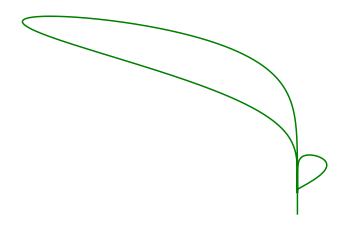

In [103]:
n = chapter_number
t = np.linspace(0, (2*(n-1)+1)*np.pi/2, 1000)
x = t*np.cos(t)**3
y = 9*t*np.sqrt(np.abs(np.cos(t))) + t*np.sin(0.3*t)*np.cos(2*t)
plt.plot(x, y, c="green")
plt.axis('off');

In [104]:
end = time.time()
print(f'Chapter {chapter_number} took {int(end - start):d} seconds')

Chapter 2 took 11 seconds
